# Chronic Kidney Disease Prediction
In this notebook, we will attempt to make machine learning models using **Chronic Kindey Disease Data**, which in return identifies whether a person may have chronic kidney disease or not.

# Importing Libraries

In [107]:
# importing python libraries
%matplotlib inline
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

## Load the Data

In [9]:
# load the data
kidney_data = pd.read_csv('kidney_disease.csv')

print(kidney_data.shape)
print('Number of rows: %s' % str(kidney_data.shape[0]))
print('Number of columns: %s' % str(kidney_data.shape[1]))

(400, 26)
Number of rows: 400
Number of columns: 26


In [12]:
kidney_data.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [13]:
# get some statistical information
kidney_data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [14]:
kidney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [15]:
# print dataset columns
kidney_data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [16]:
print(kidney_data['dm'])

0      yes
1       no
2      yes
3       no
4       no
      ... 
395     no
396     no
397     no
398     no
399     no
Name: dm, Length: 400, dtype: object


## Data Preprocessing
Our data contains missing, null and Nan values, and it also contains categorical values which need to be converted to numerical form. We will undergo data preprocessing steps in below section to make data ready for modelling. This step includes:
* Checking for null, missing and NaN values
* Removing null, missing and NaN values
* Getting the the ready in a form to apply machine learning

In [17]:
kidney_data.shape

(400, 26)

We have a total of **400** samples and **26** features in data.

In [18]:
kidney_data = kidney_data.drop('id', axis=1)

In [19]:
kidney_data.head(3)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd


In [20]:
# make column names easy to comprehend
'''
The column names are named in abbreviative manner. For making a comprehension about them, we will rename it in way that
it could be understood easily.
'''
kidney_data.columns = ['age', 'blood_pressure', 'specific_gravity', 
                      'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
                      'pus_cell_clumps', 'bacteria', 'blood_gulucose_random', 
                      'blood_uera', 'serum_creatinine', 'sodium', 'potassium',
                      'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 
                      'red_blood_cell_count', 'hypertension', 'diabetes_mallitus', 
                      'coronary_artery_disease', 'appetite', 'peda_edema',
                      'anaemia', 'class']

In [21]:
kidney_data.head(4)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_gulucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mallitus,coronary_artery_disease,appetite,peda_edema,anaemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd


In [22]:
kidney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_gulucose_random    356 non-null    float64
 10  blood_uera               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

### Converting Columns to Numerical Types

In [23]:
kidney_data['packed_cell_volume'] = pd.to_numeric(kidney_data['packed_cell_volume'], 
                                                 errors='coerce')
kidney_data['white_blood_cell_count'] = pd.to_numeric(kidney_data['white_blood_cell_count'], 
                                                     errors='coerce')
kidney_data['red_blood_cell_count'] = pd.to_numeric(kidney_data['white_blood_cell_count'], 
                                                     errors='coerce')

In [26]:
print(kidney_data['white_blood_cell_count'].dtype)
print(kidney_data['packed_cell_volume'].dtype)
print(kidney_data['red_blood_cell_count'].dtype)

float64
float64
float64


### Extract Column Types

In [27]:
# extract categorical & numerical columns
cat_cols = [i for i in kidney_data.columns if kidney_data[i].dtype=='object']
numeric_cols = [i for i in kidney_data.columns if kidney_data[i].dtype!='object']

In [28]:
print('Number of categorical columns: %s' % str(len(cat_cols)))
print('Number of numerical columns: %s' % str(len(numeric_cols)))

Number of categorical columns: 11
Number of numerical columns: 14


In [29]:
# check for missing values in each column
for c in cat_cols:
    print(f'{c} has {kidney_data[c].unique()} values\n')

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mallitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

anaemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [30]:
# replacing incorrect values in columns
kidney_data['diabetes_mallitus'] = kidney_data['diabetes_mallitus'].replace(to_replace={'\tno': 'no', '\tyes': 'yes', 'yes':'yes'})
kidney_data['coronary_artery_disease'] = kidney_data['coronary_artery_disease'].replace(to_replace='\tno', value='no')
kidney_data['class'] = kidney_data['class'].replace(to_replace={'ckd\t': 'ckd', 'ckd': 'ckd', 'notckd': 'not ckd'})

In [32]:
kidney_data.head(5)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_gulucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mallitus,coronary_artery_disease,appetite,peda_edema,anaemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,7800.0,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,6000.0,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,7500.0,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,6700.0,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,7300.0,no,no,no,good,no,no,ckd


In [33]:
# map labels as 0 or 1
# we will map as 0: no disease, 1: disease
kidney_data['class'] = kidney_data['class'].map({'ckd': 0, 'not ckd': 1}) 

In [34]:
kidney_data['class'].head(4)

0    0
1    0
2    0
3    0
Name: class, dtype: int64

In [35]:
# check for null or missing values
kidney_data.isna().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       106
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_gulucose_random       44
blood_uera                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mallitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
anaemia                      1
class                        0
dtype: int64

In [36]:
# checking for sum of null values in each column
kidney_data.isna().sum().to_numpy()

array([  9,  12,  47,  46,  49, 152,  65,   4,   4,  44,  19,  17,  87,
        88,  52,  71, 106, 106,   2,   2,   2,   1,   1,   1,   0],
      dtype=int64)

Each column in our data contains missing, null or NaN values, which need to be cleaned. We will perform imputation technique to remove these null values.

### Performing Imputation to Remove Missing Values

In [37]:
# making an imputation function
def random_imputation(x):
    random_sample = kidney_data[x].dropna().sample(kidney_data[x].isna().sum())
    random_sample.index = kidney_data[kidney_data[x].isnull()].index
    kidney_data.loc[kidney_data[x].isnull(), x] = random_sample

# define imputation mode    
def imputation_mode(x):
    mode = kidney_data[x].mode()[0]
    kidney_data[x] = kidney_data[x].fillna(mode)

In [38]:
# apply function to columns
for c in numeric_cols:
    random_imputation(c)

In [39]:
# check for null or missing values
kidney_data[numeric_cols].isna().sum().sort_values(ascending=False)

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_gulucose_random     0
blood_uera                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [40]:
# clean categorical columns
random_imputation('red_blood_cells')
random_imputation('pus_cell')

for c in cat_cols:
    imputation_mode(c)

In [41]:
# check for null or missing values
kidney_data[cat_cols].isna().sum().sort_values(ascending=False)

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mallitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
anaemia                    0
class                      0
dtype: int64

We can now see that there is no missing, null or NaN value left in categorical features of dataset.

In [42]:
# check data again
kidney_data.head(2)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_gulucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mallitus,coronary_artery_disease,appetite,peda_edema,anaemia,class
0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,7800.0,yes,yes,no,good,no,no,0
1,7.0,50.0,1.02,4.0,0.0,abnormal,normal,notpresent,notpresent,165.0,...,38.0,6000.0,6000.0,no,no,no,good,no,no,0


In [43]:
# checking for sum of null values in each column
kidney_data.isna().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

### Label Encoding
For converting all categorical columns to number form, we will perform **Label Encoding** to each of the feature, so that each feature may have all numbered values.

In [44]:
# initialize label encoder
encoder = LabelEncoder()

# convert all categorical cols to labels
for column in cat_cols:
    kidney_data[column] = encoder.fit_transform(kidney_data[column])  

In [45]:
kidney_data.head(5)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_gulucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mallitus,coronary_artery_disease,appetite,peda_edema,anaemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,7800.0,1,2,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,165.0,...,38.0,6000.0,6000.0,0,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,7500.0,0,2,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,6700.0,1,1,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,7300.0,0,1,0,0,0,0,0


### Conclusion
After performing a complete data preprocessing process to our data, we have come out with the result that:
* There is no null, missing or NaN valued feature left
* There is no feature containing categorical data
* Data is clean, preprocessed and is ready to be modeled

In [94]:
# kidney_data.to_csv('cleaned_kidney_data.csv')

## Data Visualizations

<AxesSubplot:xlabel='class', ylabel='count'>

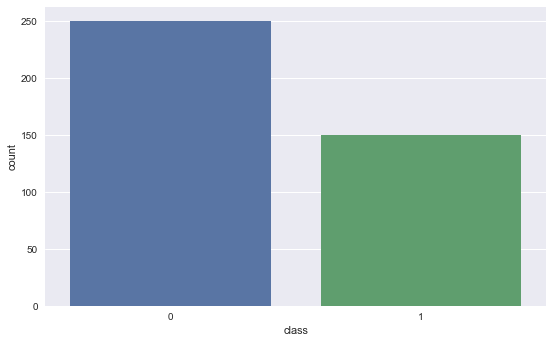

In [49]:
# make data visualizations
sns.countplot(x=kidney_data['class'])

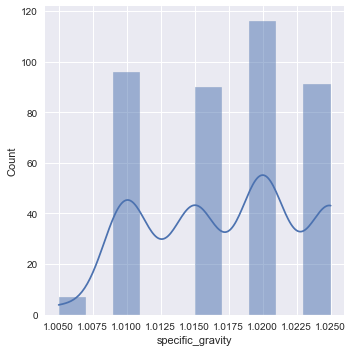

In [50]:
sns.displot(x=kidney_data['specific_gravity'], kde=True)

## Set Predictors (X) and Target (Y) Values

In [52]:
X = kidney_data.drop('class', axis=1)
y = kidney_data['class']

X.shape, y.shape

((400, 24), (400,))

## Feature Scaling
For scaling the features to remove bias in data, we will use Min-Max Scaling as tool. The Min-Max Scaler performs such that:
* All values are scaled in a given range
* For our data, the range is set to (0, 1)

In [53]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[3]

array([0.52272727, 0.15384615, 0.        , 0.8       , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.20299145,
       0.13992298, 0.04497354, 0.67192429, 0.        , 0.55102041,
       0.51111111, 0.18595041, 0.18595041, 1.        , 0.5       ,
       0.        , 1.        , 1.        , 1.        ])

## Data Splicing
For applying model, data needs to be split. We will use a ratio of **80-20** for our data such that:
* 80% data is kept in training set
* 20% data is kept in testing set

In [54]:
# make train/test splits

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(320, 24)
(80, 24)
(320,)
(80,)


## Apply Models
We will use 6 (3 machine learning & 3 deep learning) models for classification task:
* Support Vector Machine (SVM)
* Random Forest Clasifier
* Decision Tree Classifier
* Artificial Neural Network (ANN)
* Multi-Layered Perceptron (MLP)

### a. Applying Support Vector Machine (SVM)

In [55]:
svc = SVC()
svc.fit(X_train, Y_train)

SVC()

In [56]:
# make predictions of test set
y_pred_svm = svc.predict(X_test)
y_pred_svm[:10]

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [57]:
# calculate accuracies on train and test datasets
print('Accuracy of Support Vector Machine on train data: %.5f' % svc.score(X_train, Y_train))
print('Accuracy of Support Vector Machine on test data: %.2f' % svc.score(X_test, Y_test))

Accuracy of Support Vector Machine on train data: 0.98750
Accuracy of Support Vector Machine on test data: 0.97


In [58]:
df_svm = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_svm})
df_svm.head(6)

,Actual,Predicted
12,0,0
396,1,1
0,0,0
308,1,1
315,1,1
188,0,0


In [59]:
# make confusion matrix
confusion_matrix(Y_test, y_pred_svm)

array([[48,  2],
       [ 0, 30]], dtype=int64)

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


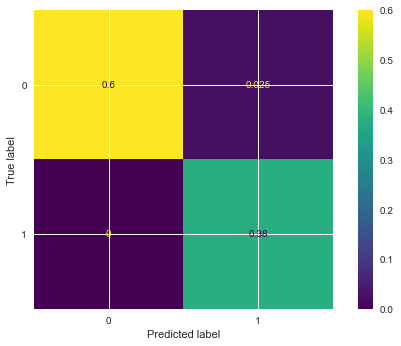

In [60]:
plot_confusion_matrix(svc, X_test, Y_test, normalize='all')

In [61]:
print(classification_report(Y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.94      1.00      0.97        30

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



<BarContainer object of 2 artists>

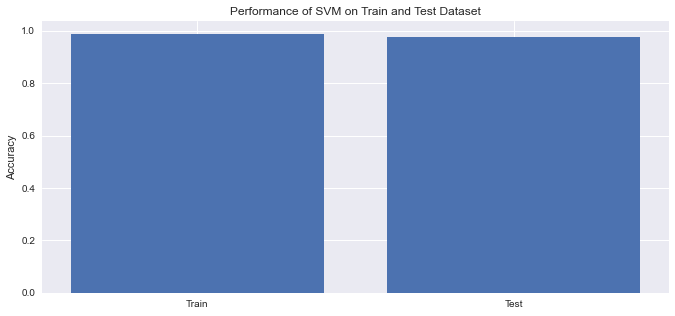

In [63]:
plt.figure(figsize=(10, 5))
plt.ylabel('Accuracy')
plt.title('Performance of SVM on Train and Test Dataset')
clf = ['Train', 'Test']
acc = [svc.score(X_train, Y_train), accuracy_score(Y_test, y_pred_svm)]

plt.bar(clf, acc)

### b. Decision Tree Classifier

In [92]:
dt = DecisionTreeClassifier(criterion='gini', 
                            splitter='best')
# fit the model
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [98]:
# make predictions using dt
y_hat_dt = dt.predict(X_test, )

In [96]:
# calculate accuracies on train and test datasets
print('Accuracy of Decision Tree on train data: %.3f' % dt.score(X_train, Y_train))
print('Accuracy of Decision Tree on test data: %.2f' % dt.score(X_test, Y_test))

Accuracy of Decision Tree on train data: 1.000
Accuracy of Decision Tree on test data: 0.97


In [112]:
# make confusion matrix
cm = confusion_matrix(Y_test, y_hat_dt, labels=dt.classes_)
cm

array([[49,  1],
       [ 1, 29]], dtype=int64)

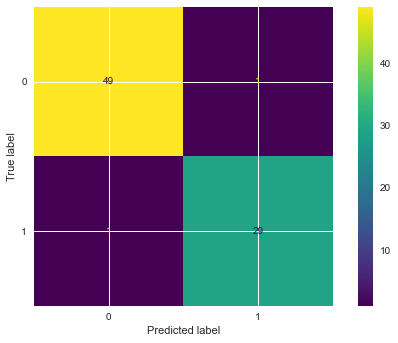

In [113]:
matrix = ConfusionMatrixDisplay(cm, display_labels=dt.classes_)
matrix.plot()

### c. Random Forest Classifier

In [114]:
rf = RandomForestClassifier(n_estimators=100, 
                            criterion='gini', 
                            max_features='auto')
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [115]:
y_hat_rf = rf.predict(X_test)

In [118]:
# calculate accuracies on train and test datasets
print('Accuracy of Random Forest on train data: %.5f' % rf.score(X_train, Y_train))
print('Accuracy of Random Forest on test data: %.3f' % rf.score(X_test, Y_test))

Accuracy of Random Forest on train data: 1.00000
Accuracy of Random Forest on test data: 0.988


In [126]:
# make confusion matrix
cm = confusion_matrix(Y_test, y_hat_rf)
cm

array([[50,  0],
       [ 1, 29]], dtype=int64)

Text(127.15, 0.5, 'Actual Values ')

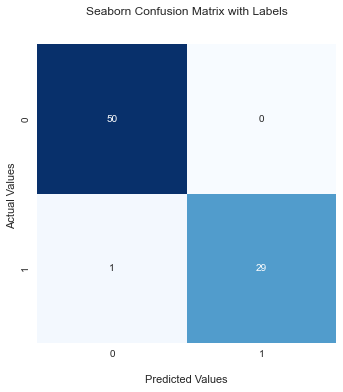

In [128]:
ax = sns.heatmap(cm, square=True, annot=True, 
                 cmap='Blues', fmt='d', 
                 cbar=False)

ax.set_title('Seaborn Confusion Matrix with Labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

In [129]:
print(classification_report(Y_test, y_hat_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.97      0.98        30

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



<BarContainer object of 3 artists>

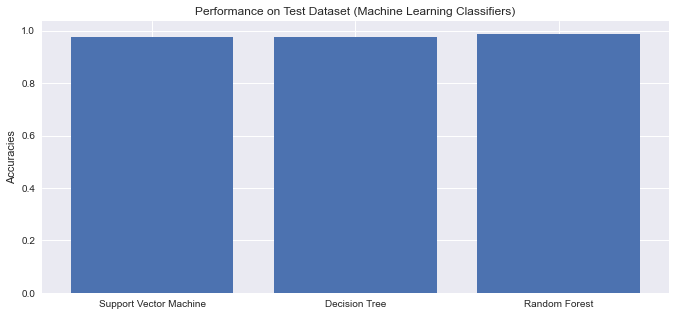

In [144]:
# score = den.evaluate(X_test, Y_test, verbose=0)


plt.figure(figsize=(10, 5))
plt.ylabel('Accuracies')
plt.title('Performance on Test Dataset (Machine Learning Classifiers)')
clf = ['Support Vector Machine', 'Decision Tree', 'Random Forest']
acc = [accuracy_score(Y_test, y_pred_svm), accuracy_score(Y_test, y_hat_dt), accuracy_score(Y_test, y_hat_rf)]

plt.bar(clf, acc)

### d. Multi-Layered Perceptron (MLP)

In [133]:
# initialize MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), 
                   activation='relu', solver='sgd', max_iter=500)

# fit the model
mlp.fit(X_train, Y_train)

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=500, solver='sgd')

In [135]:
y_hat_mlp = mlp.predict(X_test)

In [136]:
# calculate accuracies on train and test datasets
print('Accuracy of MLP on train data: %.5f' % rf.score(X_train, Y_train))
print('Accuracy of MLP on test data: %.3f' % rf.score(X_test, Y_test))

Accuracy of MLP on train data: 1.00000
Accuracy of MLP on test data: 0.988


In [138]:
# make confusion matrix
cm = confusion_matrix(Y_test, y_hat_mlp)
cm

array([[44,  6],
       [ 0, 30]], dtype=int64)

Text(127.15, 0.5, 'Actual Values ')

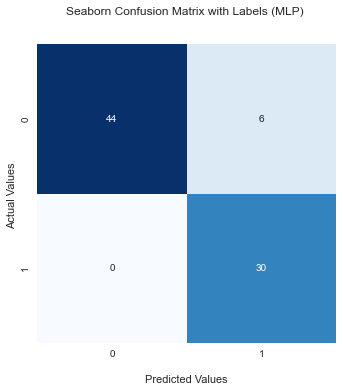

In [140]:
ax = sns.heatmap(cm, square=True, annot=True, 
                 cmap='Blues', fmt='d', 
                 cbar=False)

ax.set_title('Seaborn Confusion Matrix with Labels (MLP) \n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

In [142]:
print(classification_report(Y_test, y_hat_mlp))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        50
           1       0.83      1.00      0.91        30

    accuracy                           0.93        80
   macro avg       0.92      0.94      0.92        80
weighted avg       0.94      0.93      0.93        80



### e. Applying Deep Neural Network Network (DNN)

In [67]:
# make ann function
def deep_neural_network():
    model = Sequential()
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

# call the function
dnn = deep_neural_network()

In [79]:
# compiling the model
opt = Adam(0.01)

dnn.compile(optimizer=opt, 
              loss='binary_crossentropy',  
              metrics=['accuracy'])

In [80]:
# fit the model to data
history = dnn.fit(X_train, Y_train, 
                    epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
8/8 [==============================] - 1s 26ms/step - loss: 0.5262 - accuracy: 0.7578 - val_loss: 0.2143 - val_accuracy: 0.9375
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 0.1352 - accuracy: 0.9453 - val_loss: 0.0467 - val_accuracy: 0.9688
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0574 - accuracy: 0.9805 - val_loss: 0.0409 - val_accuracy: 0.9844
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 0.0448 - accuracy: 0.9922 - val_loss: 0.0222 - val_accuracy: 0.9844
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0618 - accuracy: 0.9609 - val_loss: 0.0196 - val_accuracy: 0.9844
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0303 - accuracy: 0.9883 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 7/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0670 - accuracy: 0.9766 - val_loss: 0.0821 - val_accuracy: 0.9844
Epoch 8/50
8/8 [================

In [82]:
# print model summary
dnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               12800     
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 177,153
Trainable params: 177,153
Non-trainable params: 0
_________________________________________________________________


In [149]:
# evaluate the model
score = dnn.evaluate(X_test, Y_test)
print("%s: %.2f%%" % (dnn.metrics_names[1], score[1] * 100))

3/3 [==============================] - 0s 3ms/step - loss: 0.0542 - accuracy: 0.9750
accuracy: 97.50%


### Visualization of Results
We will make a graph that shows the loss and accuracy of model on training and testing data. We will make 2 graphs as:
* One graph shows the accuracy on training and testing datasets
* Second graph shows the loss on training and testing datasets

### Graph 1 - Train/Test Accuracy

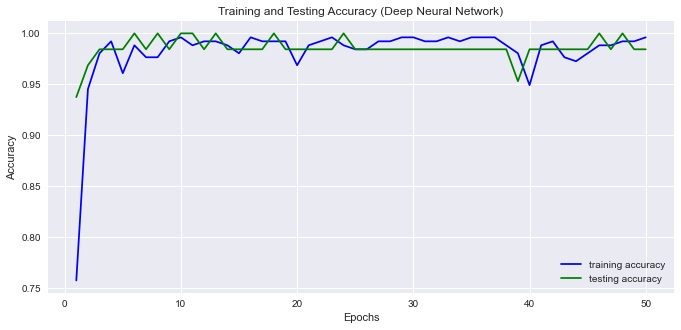

In [85]:
his = history.history
epochs = range(1, len(his['loss']) + 1)
loss = his['loss']
val_loss = his['val_loss']
acc = his['accuracy']
val_acc = his['val_accuracy']

# make a graph of train/test acc
plt.figure(figsize=(10, 5))
plt.title('Training and Testing Accuracy (Deep Neural Network)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='training accuracy', color='blue')
plt.plot(epochs, val_acc, label='testing accuracy', color='g')
plt.legend()

### Graph 2 - Train/Test Loss

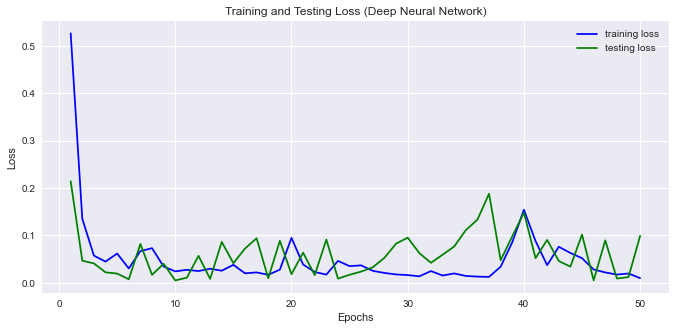

In [86]:
# make a graph of train/test loss
plt.figure(figsize=(10, 5))
plt.title('Training and Testing Loss (Deep Neural Network)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='training loss', color='blue')
plt.plot(epochs, val_loss, label='testing loss', color='g')
plt.legend()

In [88]:
# check predictions made by deep neural network
y_hat_dnn = dnn.predict(X_test)
y_hat_dnn[:5]

array([[0.0000000e+00],
       [9.9993384e-01],
       [3.4062392e-15],
       [9.9943352e-01],
       [9.9868298e-01]], dtype=float32)

In [89]:
# make class predictions with dnn
predictions = (dnn.predict(X_test) > 0.5).astype(int)
predictions[:5]

array([[0],
       [1],
       [0],
       [1],
       [1]])

In [90]:
# make classification report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.97      0.97      0.97        30

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



In [91]:
# print confusion matrix
confusion_matrix(Y_test, predictions)

array([[49,  1],
       [ 1, 29]], dtype=int64)

### e. Deep Neural Network (DNN) - V2

In [145]:
# make ann function
def deep_neural_network_v2():
    model = Sequential()
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

# call the function
dnn_v2 = deep_neural_network_v2()

In [146]:
# compiling the model
opt = Adam(0.01)

dnn_v2.compile(optimizer=opt, 
              loss='binary_crossentropy',  
              metrics=['accuracy'])

In [150]:
# fit the model to data
history_v2 = dnn_v2.fit(X_train, Y_train, 
                    epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0266 - accuracy: 0.9883 - val_loss: 0.0676 - val_accuracy: 0.9844
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0186 - accuracy: 1.0000 - val_loss: 0.0325 - val_accuracy: 0.9844
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0115 - accuracy: 0.9961 - val_loss: 0.0788 - val_accuracy: 0.9844
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0073 - accuracy: 0.9961 - val_loss: 0.1159 - val_accuracy: 0.9844
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0158 - accuracy: 0.9922 - val_loss: 0.0843 - val_accuracy: 0.9844
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0472 - accuracy: 0.9883 - val_loss: 0.0129 - val_accuracy: 0.9844
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0127 - accuracy: 0.9961 - val_loss: 0.0552 - val_accuracy: 0.9844
Epoch 8/100
8/8 [=========

8/8 [==============================] - 0s 6ms/step - loss: 5.9916e-05 - accuracy: 1.0000 - val_loss: 0.1515 - val_accuracy: 0.9844
Epoch 60/100
8/8 [==============================] - 0s 7ms/step - loss: 5.8128e-05 - accuracy: 1.0000 - val_loss: 0.1519 - val_accuracy: 0.9844
Epoch 61/100
8/8 [==============================] - 0s 6ms/step - loss: 5.5158e-05 - accuracy: 1.0000 - val_loss: 0.1473 - val_accuracy: 0.9844
Epoch 62/100
8/8 [==============================] - 0s 6ms/step - loss: 5.3247e-05 - accuracy: 1.0000 - val_loss: 0.1441 - val_accuracy: 0.9844
Epoch 63/100
8/8 [==============================] - 0s 6ms/step - loss: 5.5985e-05 - accuracy: 1.0000 - val_loss: 0.1514 - val_accuracy: 0.9844
Epoch 64/100
8/8 [==============================] - 0s 6ms/step - loss: 4.8273e-05 - accuracy: 1.0000 - val_loss: 0.1497 - val_accuracy: 0.9844
Epoch 65/100
8/8 [==============================] - 0s 6ms/step - loss: 4.6301e-05 - accuracy: 1.0000 - val_loss: 0.1491 - val_accuracy: 0.9844
Epoch

In [151]:
# evaluate the model
score_v2 = dnn_v2.evaluate(X_test, Y_test)
print("%s: %.2f%%" % (dnn_v2.metrics_names[1], score_v2[1] * 100))

3/3 [==============================] - 0s 3ms/step - loss: 0.1938 - accuracy: 0.9625
accuracy: 96.25%


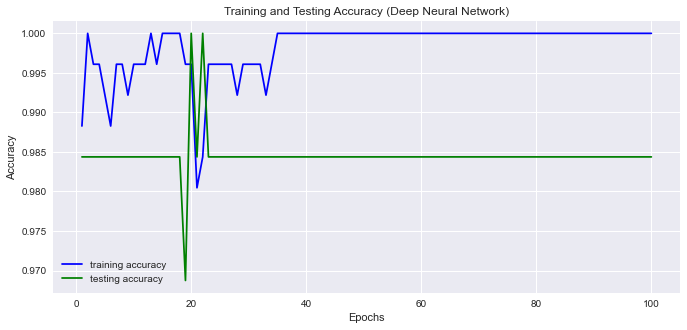

In [152]:
his = history_v2.history
epochs = range(1, len(his['loss']) + 1)
loss = his['loss']
val_loss = his['val_loss']
acc = his['accuracy']
val_acc = his['val_accuracy']

# make a graph of train/test acc
plt.figure(figsize=(10, 5))
plt.title('Training and Testing Accuracy (Deep Neural Network)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='training accuracy', color='blue')
plt.plot(epochs, val_acc, label='testing accuracy', color='g')
plt.legend()

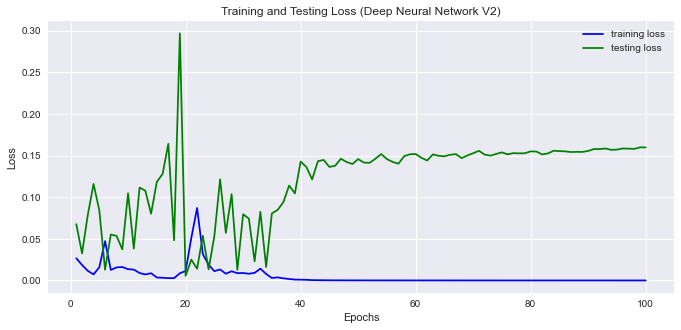

In [153]:
# make a graph of train/test loss
plt.figure(figsize=(10, 5))
plt.title('Training and Testing Loss (Deep Neural Network V2)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='training loss', color='blue')
plt.plot(epochs, val_loss, label='testing loss', color='g')
plt.legend()

## Commulative Comparison of Deep Learning Classifiers

<BarContainer object of 3 artists>

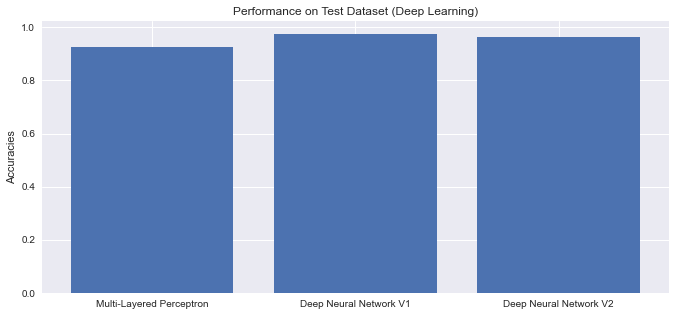

In [155]:
score = dnn.evaluate(X_test, Y_test, verbose=0)
score_v2 = dnn_v2.evaluate(X_test, Y_test, verbose=0)

plt.figure(figsize=(10, 5))
plt.ylabel('Accuracies')
plt.title('Performance on Test Dataset (Deep Learning)')
clf = ['Multi-Layered Perceptron', 'Deep Neural Network V1', 'Deep Neural Network V2']
acc = [accuracy_score(Y_test, y_hat_mlp), score[1], score_v2[1]]

plt.bar(clf, acc)